# MACHINE LEARNING TUTORIAL ON RANDOM FOREST FOR CUSTOMER LIFETIME VALUE PREDICTION
### GITHUB Repository link: https://github.com/sadifshaik/CUSTOMER-LIFETIME-VALUE-PREDICTION
### Dataset Link: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


# Load the dataset
file_path = 'E-commerce Customer Behavior - Sheet1.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handle missing values (fill with mode for categorical data)
df.loc[:, 'Satisfaction Level'] = df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0])

# Drop irrelevant columns
df = df.drop(columns=['Customer ID'])

# Encode categorical variables using OneHotEncoder
categorical_columns = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))

# Assign column names to encoded features
encoded_features.columns = encoder.get_feature_names_out(categorical_columns)

# Drop original categorical columns and concatenate encoded ones
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, encoded_features], axis=1)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data into training and testing sets
target = 'Total Spend'
features = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, df[target], test_size=0.2, random_state=42
)

# Show data after handling missing values
print("\nData after handling missing values:")
print(df.isnull().sum())

# Display dataset shape after preprocessing
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')



Data after handling missing values:
Age                               0
Total Spend                       0
Items Purchased                   0
Average Rating                    0
Discount Applied                  0
Days Since Last Purchase          0
Gender_Male                       0
City_Houston                      0
City_Los Angeles                  0
City_Miami                        0
City_New York                     0
City_San Francisco                0
Membership Type_Gold              0
Membership Type_Silver            0
Satisfaction Level_Satisfied      0
Satisfaction Level_Unsatisfied    0
dtype: int64
Training set size: (280, 15)
Test set size: (70, 15)


# Exploratory Data Analysis

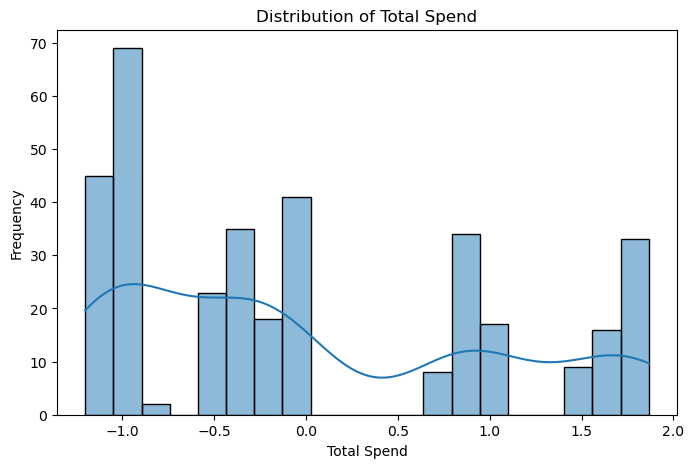

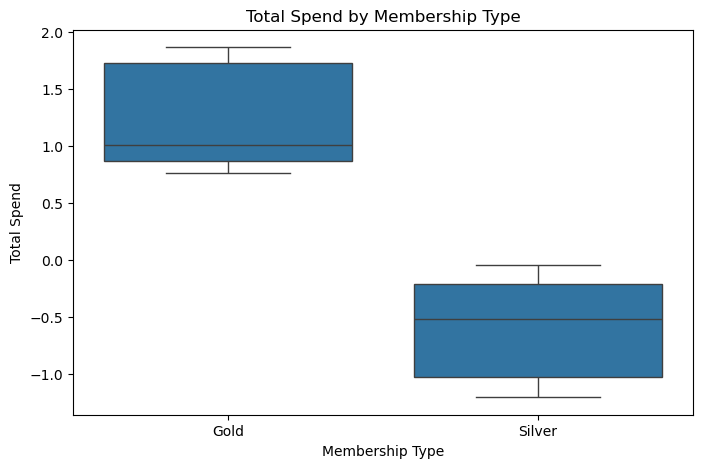

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total Spend
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Spend'], bins=20, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

# Total Spend by Membership Type
# Create a new column to represent Membership Type from encoded columns
df['Membership Type'] = df[['Membership Type_Silver', 'Membership Type_Gold']].idxmax(axis=1).str.replace('Membership Type_', '')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Membership Type', y='Total Spend', data=df)
plt.title('Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.show()



# Machine Learning Model Implimentation

### Train the Random Forest Model

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define target and features
target = 'Total Spend'
features = df.drop([target, 'Membership Type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, df[target], test_size=0.2, random_state=42
)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Evaluate the Model

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.0007119687381027424
Root Mean Squared Error (RMSE): 0.026682742327256065
R-squared (R²): 0.9993117502752106


### Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print(f"Best parameters: {grid_search.best_params_}")

# Re-evaluate model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"R² (Best Model): {r2_score(y_test, y_pred_best)}")


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
R² (Best Model): 0.9994076900849606
